<a href="https://colab.research.google.com/github/Pawcio93/House-Prices-Kaggle-/blob/master/House_prices_ML_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARIES

In [1]:
### IMPORT LIBRARIES ###
# MATH
import math
# NUMPY
import numpy as np # linear algebra
# PANDAS
import pandas as pd # data processing
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
# MATPLOTLIB
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
# SEABORN
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
# SCIPY
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from scipy.special import boxcox1p
# WARNING
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
# SKLEARN
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import StackingRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
### MLXTEND
from mlxtend.regressor import StackingCVRegressor
# XGBOOST
from xgboost import XGBClassifier
from xgboost import XGBRegressor
# LIGTHGBM
from lightgbm import LGBMRegressor
# MODEL HELPERS
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# DISPLAY
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display_html
# POWER PREDICTIVE SCORE
!pip install ppscore
import ppscore as pps
# TABULETE
!pip install tabulate
from tabulate import tabulate
# TENSORBOARD
%load_ext tensorboard
import tensorflow as tf
import datetime
# GRIDSEARCHCV
from sklearn.model_selection import GridSearchCV
# COLAB
from google.colab import files
from google.colab import drive
# SYS
import sys
# IPYNB
!pip install import-ipynb
import import_ipynb
# UTIL
import importlib.util

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# DOWNLOAD MODULE
drive.mount('/content/drive')
sys.path.append('/content/drive/My Drive/Colab Notebooks/')
!cp -r "/content/drive/My Drive/Colab Notebooks/Data_Preparation_Library.ipynb" '/content/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# IMPORT LIBRARY
import Data_Preparation_Library as DPL
from Data_Preparation_Library import TransformData
from Data_Preparation_Library import DataProcessing
from Data_Preparation_Library import DataAnalysis

importing Jupyter notebook from Data_Preparation_Library.ipynb
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# NOTEBOOK SETTINGS

In [4]:
# Notebook settings
pd.set_option('display.max_columns', None)
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'red', 'figure.facecolor':'white'})

In [5]:
# GPU test 
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [6]:
# Device usage
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13826878324556866167, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6358382481843728490
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14111577194302899254
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11150726272
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12028310051971384317
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

# DATASET IMPORT AND OVERVIEW

In [0]:
### IMPORT AND PREPARE DATASETS ###
dataset_train = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')
data_description = open("data_description.txt", "r")

In [0]:
# Create a copy of train and test datasets
X_train = dataset_train.copy()
X_test = dataset_test.copy()
X_set = [X_train, X_test]
y_train = X_train['SalePrice']
sub_id = X_test['Id']

# PREPROCESSING
### - Drop unwanted variables
### - Clean variables with nan values 
### - Create dummies for categorical variables

## INITIAL DROP

In [0]:
# Create class object
preproc = DataProcessing(X_train,X_test)

In [10]:
# Create list of unwanted variables
preproc.drop_vars_list(freq = 0.95, null_factor = 0.6)

['Street',
 'Alley',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'Heating',
 'LowQualFinSF',
 'KitchenAbvGr',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal']

In [0]:
# Customize drop list
preproc.drop_list.remove('Alley')
preproc.drop_list.remove('Fence')

In [12]:
# Delete unwanted variables from train and test sets
preproc.drop()

Columns removed


## CLEANING

In [13]:
# Create list of variables with nan values
preproc.cleaning_vars_list()

cleaning_list CREATED:['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'MSZoning', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']


In [0]:
### CLEANING ###

In [0]:
# Clean LotFrontage for Train and Test dataset
# Filling missing values with most correlated variable coeffiecient calculation
preproc.fill_with_estimate_value(cleaned_column = 'LotFrontage', coeff_column = 'LotArea')

In [0]:
# Clean Alley for Train and Test dataset
# Filling missing values with NoAlley
preproc.fill_with(column='Alley', value = 'NoAlley')

In [0]:
# Clean MasVnrType for Train and Test dataset
# Filling missing values with most common value
preproc.fill_with_most_common_value(column= 'MasVnrType')

In [0]:
# Clean MasVnrArea for Train and Test dataset
# Filling missing values with median
preproc.fill_with_median(column='MasVnrArea', dependent_column='MasVnrType', excluded_values=['None'])

In [0]:
# Clean BsmtQual for Train and Test dataset
# Filling missing values with selected strings
preproc.fill_with_strings(column='BsmtQual',
                          dependent_column='Foundation',
                          condition_list=['PConc'],
                          value_list=['Gd'],
                          last_value = 'TA')

In [0]:
# Clean BsmtCond for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with(column='BsmtCond', value='TA')

In [0]:
# Clean BsmtCond for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with(column='BsmtExposure', value='NA')

In [0]:
# Clean BsmtFinType1 for Train and Test dataset
# Filling missing values with selected strings
preproc.fill_with_strings(column='BsmtFinType1',
                          dependent_column='Foundation',
                          condition_list=['PConc'],
                          value_list=['GLQ'],
                          last_value = 'Unf')

In [0]:
# Clean BsmtFinType2 for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with(column='BsmtFinType2', value='Unf')

In [0]:
preproc.fill_with(column='Electrical', value='SBrkr')

In [0]:
# Clean FireplaceQu for Train and Test dataset
# Filling missing values with NA
preproc.fill_with(column='FireplaceQu', value='NA')

In [0]:
# Clean GarageType for Train and Test dataset
# Filling missing values with NA
preproc.fill_with(column='GarageType', value='NA')

In [0]:
# Clean GarageYrBlt for Train and Test dataset
# Filling missing values with 0
preproc.fill_with(column='GarageYrBlt', value=0)

In [0]:
# Clean GarageFinish for Train and Test dataset
# Filling missing values with NA
preproc.fill_with(column='GarageFinish', value='NA')

In [0]:
# Clean GarageQual for Train and Test dataset
# Filling missing values with NA
preproc.fill_with(column='GarageQual', value='NA')

In [0]:
# Clean GarageCond for Train and Test dataset
# Filling missing values with NA
preproc.fill_with(column='GarageCond', value='NA')

In [0]:
# Clean GarageCond for Train and Test dataset
# Filling missing values with NA
preproc.fill_with(column='Fence', value='NA')

In [0]:
# Clean MSZoning for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with_most_common_value(column='MSZoning')

In [0]:
# Clean Exterior1st for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with(column='Exterior1st', value='VinylSd')

In [0]:
# Clean Exterior2nd for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with(column='Exterior2nd', value='VinylSd')

In [0]:
# Clean BsmtFinSF1 for Train and Test dataset
# Filling missing values with 0
preproc.fill_with(column='BsmtFinSF1', value=0)

In [0]:
# Clean BsmtFinSF2 for Train and Test dataset
# Filling missing values with 0
preproc.fill_with(column='BsmtFinSF2', value=0)

In [0]:
# Clean BsmtUnfSF for Train and Test dataset
# Filling missing values with 0
preproc.fill_with(column='BsmtUnfSF', value=0)

In [0]:
# Clean TotalBsmtSF for Train and Test dataset
# Filling missing values with 0
preproc.fill_with(column='TotalBsmtSF', value=0)

In [0]:
# Clean BsmtFullBath for Train and Test dataset
# Filling missing values with 0
preproc.fill_with(column='BsmtFullBath', value=0)

In [0]:
# Clean BsmtHalfBath for Train and Test dataset
# Filling missing values with 0
preproc.fill_with(column='BsmtHalfBath', value=0)

In [0]:
# Clean KitchenQual for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with(column='KitchenQual', value='TA')

In [0]:
# Clean Functional for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with_most_common_value(column='Functional')

In [0]:
# Clean GarageCars for Train and Test dataset
# Filling missing values with most common value
preproc.fill_with(column='GarageCars', value=2)

In [44]:
# Clean GarageArea for test dataset  
# Checking number of nan values         
print(X_train['GarageArea'].isnull().sum())
print(X_test['GarageArea'].isnull().sum())
# Check correlation between GarageCars and GarageArea
#sns.barplot(x = 'GarageCars', y = 'GarageArea', data=X_train) 
# Mediana of GarageArea for GarageCars = 2
X_test['GarageArea'].fillna('null', inplace = True)
g_area_for_2_list = []
for i in range(0, len(X_test)): 
    if X_test['GarageCars'][i] == 2:      
        if not X_test['GarageArea'][i] == 'null':
            g_area_for_2_list.append(X_test['GarageArea'][i])
    else:
        continue
g_area_for_2 = sum(g_area_for_2_list)/float(len(g_area_for_2_list))
# filling missing values with most common one
X_test['GarageArea'].replace('null', g_area_for_2, inplace = True)
print(X_train['GarageArea'].isnull().sum())
print(X_test['GarageArea'].isnull().sum())

0
1
0
0


In [0]:
# Clean SaleType for Train and Test dataset
# Filling missing values with most common string
preproc.fill_with(column='SaleType', value='WD')

In [0]:
# Create target and idependent variables list
target = 'SalePrice'
train_columns = list(X_train.columns.values)
train_columns.remove('SalePrice')

# DATA ANALYSIS

## SECOND DROP

In [47]:
X_train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'Fence', 'MoSold',
  

In [0]:
second_drop_list = ['LandSlope','MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'LotFrontage', '1stFlrSF', '2ndFlrSF', 'MasVnrArea']

In [0]:
# Drop unwanted variables
for dataset in X_set:
  dataset.drop(second_drop_list, axis=1, inplace = True)

In [50]:
X_train

,Id,MSSubClass,MSZoning,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,NoAlley,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,856,Ex,Y,SBrkr,1710,1,0,2,1,3,Gd,8,Typ,0,NA,Attchd,2003.000,RFn,2,548,TA,TA,Y,NA,WD,Normal,208500
1,2,20,RL,9600,NoAlley,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,1262,Ex,Y,SBrkr,1262,0,1,2,0,3,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,NA,WD,Normal,181500
2,3,60,RL,11250,NoAlley,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,920,Ex,Y,SBrkr,1786,1,0,2,1,3,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,NA,WD,Normal,223500
3,4,70,RL,9550,NoAlley,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,756,Gd,Y,SBrkr,1717,1,0,1,0,3,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,NA,WD,Abnorml,140000
4,5,60,RL,14260,NoAlley,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,1145,Ex,Y,SBrkr,2198,1,0,2,1,4,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,NA,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,NoAlley,Reg,Lvl,Inside,Gilbert,Norm,1Fam,2Story,6,5,1999,2000,Gable,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,953,Ex,Y,SBrkr,1647,0,0,2,1,3,TA,7,Typ,1,TA,Attchd,1999.000,RFn,2,460,TA,TA,Y,NA,WD,Normal,175000
1456,1457,20,RL,13175,NoAlley,Reg,Lvl,Inside,NWAmes,Norm,1Fam,1Story,6,6,1978,1988,Gable,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,1542,TA,Y,SBrkr,2073,1,0,2,0,3,TA,7,Min1,2,TA,Attchd,1978.000,Unf,2,500,TA,TA,Y,MnPrv,WD,Normal,210000
1457,1458,70,RL,9042,NoAlley,Reg,Lvl,Inside,Crawfor,Norm,1Fam,2Story,7,9,1941,2006,Gable,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,1152,Ex,Y,SBrkr,2340,0,0,2,0,4,Gd,9,Typ,2,Gd,Attchd,1941.000,RFn,1,252,TA,TA,Y,GdPrv,WD,Normal,266500
1458,1459,20,RL,9717,NoAlley,Reg,Lvl,Inside,NAmes,Norm,1Fam,1Story,5,6,1950,1996,Hip,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1078,Gd,Y,FuseA,1078,1,0,1,0,2,Gd,5,Typ,0,NA,Attchd,1950.000,Unf,1,240,TA,TA,Y,NA,WD,Normal,142125


# TRANSFORM DATA


## TRANSFORM VARIABLES

In [0]:
DataAnalysis = DataAnalysis(X_train, X_test)

### MSSubClass

In [0]:
for X in X_set:
  X['MSSubClass'] = X['MSSubClass'].replace([150, 40, 45, 75, 180], 20)

In [53]:
X_train['MSSubClass'].value_counts()

20     578
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
Name: MSSubClass, dtype: int64

In [54]:
X_test['MSSubClass'].value_counts()

20     566
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
Name: MSSubClass, dtype: int64

### MSZoning

In [0]:
for X in X_set:
  X['MSZoning'] = X['MSZoning'].replace(['RH', 'C (all)'], 'RL')

### Alley

In [0]:
for X in X_set:
  X['Alley'] = X['Alley'].replace(['Grvl', 'Pave'], 'Alley')

In [57]:
X_train['Alley'].value_counts()

NoAlley    1369
Alley        91
Name: Alley, dtype: int64

In [58]:
X_test['Alley'].value_counts()

NoAlley    1352
Alley       107
Name: Alley, dtype: int64

### LotShape

In [0]:
for X in X_set:
  X['LotShape'] = X['LotShape'].replace(['IR1', 'IR2', 'IR3'], 'IR')

In [60]:
X_train['LotShape'].value_counts()

Reg    925
IR     535
Name: LotShape, dtype: int64

In [61]:
X_test['LotShape'].value_counts()

Reg    934
IR     525
Name: LotShape, dtype: int64

### LotConfig


In [0]:
for X in X_set:
  X['LotConfig'] = X['LotConfig'].replace(['FR2', 'FR3'], 'FR')

In [63]:
X_train['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR           51
Name: LotConfig, dtype: int64

In [64]:
X_test['LotConfig'].value_counts()

Inside     1081
Corner      248
CulDSac      82
FR           48
Name: LotConfig, dtype: int64

### Neighborhood

In [0]:
for X in X_set:
  X['Neighborhood'] = X['Neighborhood'].replace(['Blueste', 'NPkVill', 'Blmngtn', 'Veenker', 'BrDale', 'MeadowV', 'ClearCr'], 'NAmes')

In [66]:
X_train['Neighborhood'].value_counts()

NAmes      325
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
SWISU       25
StoneBr     25
Name: Neighborhood, dtype: int64

In [67]:
X_test['Neighborhood'].value_counts()

NAmes      314
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
Name: Neighborhood, dtype: int64

### Condition1

In [0]:
for X in X_set:
  X['Condition1'] = X['Condition1'].replace(['RRAe', 'RRNn', 'RRNe', 'RRAn'], 'RR')
  X['Condition1'] = X['Condition1'].replace(['PosA', 'PosN'], 'Pos')

In [69]:
X_train['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RR          44
Pos         27
Name: Condition1, dtype: int64

In [70]:
X_test['Condition1'].value_counts()

Norm      1251
Feedr       83
RR          49
Artery      44
Pos         32
Name: Condition1, dtype: int64

### HouseStyle

In [0]:
for X in X_set:
  X['HouseStyle'] = X['HouseStyle'].replace(['1.5Unf'], '1.5Fin')
  X['HouseStyle'] = X['HouseStyle'].replace(['2.5Unf', '2.5Fin'], '2Story')

In [72]:
X_train['HouseStyle'].value_counts()

1Story    726
2Story    464
1.5Fin    168
SLvl       65
SFoyer     37
Name: HouseStyle, dtype: int64

In [73]:
X_train['HouseStyle'].value_counts()

1Story    726
2Story    464
1.5Fin    168
SLvl       65
SFoyer     37
Name: HouseStyle, dtype: int64

### Exterior1st

In [0]:
for X in X_set:
  X['Exterior1st'] = X['Exterior1st'].replace(['Stone', 'BrkComm', 'AsphShn', 'CBlock', 'ImStucc'], 'VinylSd')

In [75]:
X_train['Exterior1st'].value_counts()

VinylSd    522
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Name: Exterior1st, dtype: int64

In [76]:
X_test['Exterior1st'].value_counts()

VinylSd    517
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
Name: Exterior1st, dtype: int64

### Exterior2nd

In [0]:
for X in X_set:
  X['Exterior2nd'] = X['Exterior2nd'].replace(['Stone', 'Brk Cmn', 'AsphShn', 'CBlock', 'ImStucc', 'Other'], 'VinylSd')

In [78]:
X_train['Exterior2nd'].value_counts()

VinylSd    531
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
Name: Exterior2nd, dtype: int64

In [79]:
X_test['Exterior2nd'].value_counts()

VinylSd    535
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Name: Exterior2nd, dtype: int64

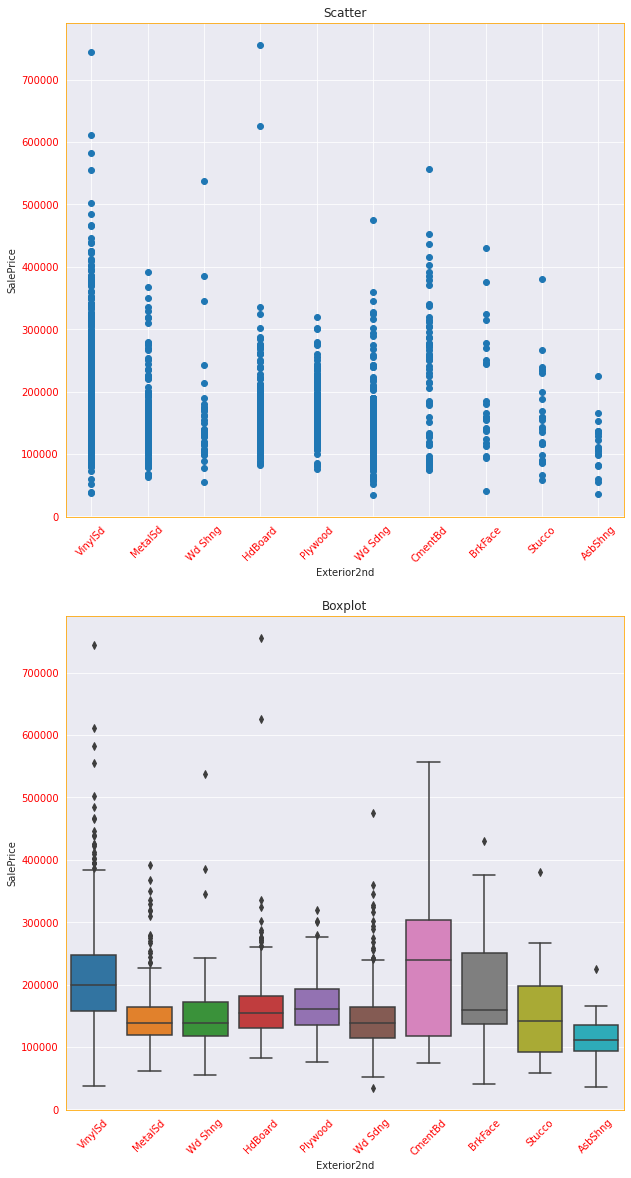

In [80]:
DataAnalysis.var_overview('Exterior2nd', 'SalePrice')

### ExterCond

In [0]:
for X in X_set:
  X['ExterCond'] = X['ExterCond'].replace('Ex', 'TA')
  X['ExterCond'] = X['ExterCond'].replace('Po', 'Fa')

In [82]:
X_train['ExterCond'].value_counts()

TA    1285
Gd     146
Fa      29
Name: ExterCond, dtype: int64

In [83]:
X_test['ExterCond'].value_counts()

TA    1265
Gd     153
Fa      41
Name: ExterCond, dtype: int64

### Foundation


In [0]:
for X in X_set:
  X['Foundation'] = X['Foundation'].replace(['Wood', 'Stone'], 'PConc')

In [85]:
X_train['Foundation'].value_counts()

PConc     656
CBlock    634
BrkTil    146
Slab       24
Name: Foundation, dtype: int64

In [86]:
X_test['Foundation'].value_counts()

PConc     668
CBlock    601
BrkTil    165
Slab       25
Name: Foundation, dtype: int64

### BsmtCond

In [0]:
for X in X_set:
  X['BsmtCond'] = X['BsmtCond'].replace('Po', 'Fa')
  X['BsmtCond'] = X['BsmtCond'].replace('Ex', 'Gd')

In [88]:
X_train['BsmtCond'].value_counts()

TA    1348
Gd      65
Fa      47
Name: BsmtCond, dtype: int64

In [89]:
X_test['BsmtCond'].value_counts()

TA    1340
Fa      62
Gd      57
Name: BsmtCond, dtype: int64

### HeatingQC

In [0]:
for X in X_set:
  X['HeatingQC'] = X['HeatingQC'].replace('Po', 'Fa')

In [91]:
X_train['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     50
Name: HeatingQC, dtype: int64

In [92]:
X_test['HeatingQC'].value_counts()

Ex    752
TA    429
Gd    233
Fa     45
Name: HeatingQC, dtype: int64

### Electrical

In [0]:
for X in X_set:
  X['Electrical'] = X['Electrical'].replace(['FuseA', 'FuseF', 'FuseP', 'Mix'], 'Other')

In [94]:
X_train['Electrical'].value_counts()

SBrkr    1335
Other     125
Name: Electrical, dtype: int64

In [95]:
X_test['Electrical'].value_counts()

SBrkr    1337
Other     122
Name: Electrical, dtype: int64

### BsmtFullBath

In [0]:
for X in X_set:
  X['BsmtFullBath'] = X['BsmtFullBath'].replace([1, 2, 3], 'Yes')
  X['BsmtFullBath'] = X['BsmtFullBath'].replace([0], 'No')

In [97]:
X_train['BsmtFullBath'].value_counts()

No     856
Yes    604
Name: BsmtFullBath, dtype: int64

In [98]:
X_test['BsmtFullBath'].value_counts()

No     851
Yes    608
Name: BsmtFullBath, dtype: int64

### BsmtHalfBath

In [0]:
for X in X_set:
  X['BsmtHalfBath'] = X['BsmtHalfBath'].replace([1, 2, 3], 'Yes')
  X['BsmtHalfBath'] = X['BsmtHalfBath'].replace([0], 'No')

In [100]:
X_train['BsmtHalfBath'].value_counts()

No     1378
Yes      82
Name: BsmtHalfBath, dtype: int64

In [101]:
X_test['BsmtHalfBath'].value_counts()

No     1366
Yes      93
Name: BsmtHalfBath, dtype: int64

### BedroomAbvGr

In [0]:
for X in X_set:
  X['BedroomAbvGr'] = X['BedroomAbvGr'].replace([6, 7, 8], 5)
  X['BedroomAbvGr'] = X['BedroomAbvGr'].replace([0], 1)

In [103]:
X_train['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     56
5     29
Name: BedroomAbvGr, dtype: int64

In [104]:
X_test['BedroomAbvGr'].value_counts()

3    792
2    384
4    187
1     55
5     41
Name: BedroomAbvGr, dtype: int64

### TotRmsAbvGrd

In [0]:
for X in X_set:
  X['TotRmsAbvGrd'] = X['TotRmsAbvGrd'].replace([11, 12, 13, 14, 15], 10)
  X['TotRmsAbvGrd'] = X['TotRmsAbvGrd'].replace([0, 1, 2, 3], 4)

In [106]:
X_train['TotRmsAbvGrd'].value_counts()

6     402
7     329
5     275
8     187
4     115
10     77
9      75
Name: TotRmsAbvGrd, dtype: int64

In [107]:
X_test['TotRmsAbvGrd'].value_counts()

6     442
7     320
5     308
8     160
4     107
9      68
10     54
Name: TotRmsAbvGrd, dtype: int64

### Functional

In [0]:
for X in X_set:
  X['Functional'] = X['Functional'].replace(['Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev'], 'NonTyp')

In [109]:
X_train['Functional'].value_counts()

Typ       1360
NonTyp     100
Name: Functional, dtype: int64

In [110]:
X_test['Functional'].value_counts()

Typ       1359
NonTyp     100
Name: Functional, dtype: int64

### Fireplaces

In [0]:
for X in X_set:
  X['Fireplaces'] = X['Fireplaces'].replace([0], 'No')
  X['Fireplaces'] = X['Fireplaces'].replace([1, 2, 3, 4], 'Yes')

In [112]:
X_train['Fireplaces'].value_counts()

Yes    770
No     690
Name: Fireplaces, dtype: int64

In [113]:
X_test['Fireplaces'].value_counts()

No     730
Yes    729
Name: Fireplaces, dtype: int64

### GarageType

In [0]:
for X in X_set:
  X['GarageType'] = X['GarageType'].replace(['CarPort'], 'NA')
  X['GarageType'] = X['GarageType'].replace(['2Types', 'Basment'], 'Attchd')

In [115]:
X_train['GarageType'].value_counts()

Attchd     895
Detchd     387
NA          90
BuiltIn     88
Name: GarageType, dtype: int64

In [116]:
X_test['GarageType'].value_counts()

Attchd     887
Detchd     392
BuiltIn     98
NA          82
Name: GarageType, dtype: int64

### GarageQual

In [0]:
for X in X_set:
  X['GarageQual'] = X['GarageQual'].replace(['Po'], 'Fa')
  X['GarageQual'] = X['GarageQual'].replace(['Ex'], 'Gd')

In [118]:
X_train['GarageQual'].value_counts()

TA    1311
NA      81
Fa      51
Gd      17
Name: GarageQual, dtype: int64

In [119]:
X_test['GarageQual'].value_counts()

TA    1293
Fa      78
NA      78
Gd      10
Name: GarageQual, dtype: int64

### GarageCond

In [0]:
for X in X_set:
  X['GarageCond'] = X['GarageCond'].replace(['Gd', 'Ex'], 'TA')
  X['GarageCond'] = X['GarageCond'].replace(['NA', 'Po'], 'Fa')

In [121]:
X_train['GarageCond'].value_counts()

TA    1337
Fa     123
Name: GarageCond, dtype: int64

In [122]:
X_test['GarageCond'].value_counts()

TA    1335
Fa     124
Name: GarageCond, dtype: int64

### Fence

In [0]:
for X in X_set:
  X['Fence'] = X['Fence'].replace(['MnWw'], 'NA')

In [124]:
X_train['Fence'].value_counts()

NA       1190
MnPrv     157
GdPrv      59
GdWo       54
Name: Fence, dtype: int64

In [125]:
X_test['Fence'].value_counts()

NA       1170
MnPrv     172
GdPrv      59
GdWo       58
Name: Fence, dtype: int64

### SaleType

In [0]:
for X in X_set:
  X['SaleType'] = X['SaleType'].replace(['ConLD', 'ConLI', 'ConLw', 'CWD', 'Oth', 'Con', ], 'WD')

In [127]:
X_train['SaleType'].value_counts()

WD     1295
New     122
COD      43
Name: SaleType, dtype: int64

In [128]:
X_test['SaleType'].value_counts()

WD     1298
New     117
COD      44
Name: SaleType, dtype: int64

## MERGE VARIABLES

### Merge BsmtFullBath and BsmtHalfBath

In [0]:
for X in X_set:
  X['BsmtBath'] = X['BsmtFullBath'] + X['BsmtHalfBath']
  X.drop(['BsmtFullBath', 'BsmtHalfBath'], axis=1, inplace = True)

## TRANSFORM VARIABLES TYPE

In [0]:
# TRANFORM NUMERICAL CATEGORICAL TO STRING CATEGORICAL
# Change MSSubClass type to string 
X_train['MSSubClass'] = X_train['MSSubClass'].astype(str)
X_test['MSSubClass'] = X_test['MSSubClass'].astype(str)
# Change OverallCond type to string 
X_train['OverallCond'] = X_train['OverallCond'].astype(str)
X_test['OverallCond'] = X_test['OverallCond'].astype(str)

## NORMALITY TEST AND SKEWNESS FIX

In [131]:
# CREATING TRANSFORM OBJECT
data = TransformData(X_train, X_test)
# Normality test (skewness)
data.normality_test(target = 'SalePrice', skew_factor=0.75)

Number of skewed variables 5
['Id', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [132]:
# Fixing skew data
data.skew_fix(lmbda = 0.5)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [0]:
# y_train skewness fix
y_train = np.log1p(y_train)

In [134]:
y_train

0      12.248
1      12.109
2      12.317
3      11.849
4      12.429
        ...  
1455   12.073
1456   12.255
1457   12.493
1458   11.864
1459   11.902
Name: SalePrice, Length: 1460, dtype: float64

## DATA SCALLING

In [0]:
# Drop target column
X_train = X_train.drop('SalePrice', axis = 1)

In [0]:
X = pd.concat([X_train, X_test])

In [137]:
X

,Id,MSSubClass,MSZoning,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,BsmtBath
0,1,60,RL,9.042,NoAlley,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,26.571,Unf,29.257,Ex,Y,SBrkr,7.444,2,1,3,Gd,8,Typ,No,NA,Attchd,44.755,RFn,2.000,548.000,TA,TA,Y,NA,WD,Normal,YesNo
1,2,20,RL,9.170,NoAlley,Reg,Lvl,FR,NAmes,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,31.273,Unf,35.525,Ex,Y,SBrkr,7.140,2,0,3,TA,6,Typ,Yes,TA,Attchd,44.452,RFn,2.000,460.000,TA,TA,Y,NA,WD,Normal,NoYes
2,3,60,RL,9.328,NoAlley,IR,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,22.045,Unf,30.332,Ex,Y,SBrkr,7.488,2,1,3,Gd,6,Typ,Yes,TA,Attchd,44.733,RFn,2.000,608.000,TA,TA,Y,NA,WD,Normal,YesNo
3,4,70,RL,9.164,NoAlley,IR,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,14.697,Unf,27.495,Gd,Y,SBrkr,7.448,1,0,3,Gd,7,Typ,Yes,Gd,Detchd,44.699,Unf,3.000,642.000,TA,TA,Y,NA,WD,Abnorml,YesNo
4,5,60,RL,9.565,NoAlley,IR,Lvl,FR,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,25.593,Unf,33.838,Ex,Y,SBrkr,7.695,2,1,4,Gd,9,Typ,Yes,TA,Attchd,44.721,RFn,3.000,836.000,TA,TA,Y,NA,WD,Normal,YesNo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,7.568,NoAlley,Reg,Lvl,Inside,NAmes,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,0.000,Unf,23.367,Gd,Y,SBrkr,6.996,1,1,3,TA,5,Typ,No,NA,NA,0.000,NA,0.000,0.000,NA,Fa,Y,NA,WD,Normal,NoNo
1455,2916,160,RM,7.546,NoAlley,Reg,Lvl,Inside,NAmes,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,15.875,Unf,23.367,TA,Y,SBrkr,6.996,1,1,3,TA,6,Typ,No,NA,NA,44.385,Unf,1.000,286.000,TA,TA,Y,NA,WD,Abnorml,NoNo
1456,2917,20,RL,9.903,NoAlley,Reg,Lvl,Inside,Mitchel,Norm,1Fam,1Story,5,7,1960,1996,Gable,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,34.986,Unf,34.986,Ex,Y,SBrkr,7.110,1,0,4,TA,7,Typ,Yes,TA,Detchd,44.272,Unf,2.000,576.000,TA,TA,Y,NA,WD,Abnorml,YesNo
1457,2918,85,RL,9.253,NoAlley,Reg,Lvl,Inside,Mitchel,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,18.358,Unf,30.199,TA,Y,SBrkr,6.877,1,0,3,TA,6,Typ,No,NA,NA,0.000,NA,0.000,0.000,NA,Fa,Y,MnPrv,WD,Normal,NoYes


In [0]:
# Data skalling
skalling = RobustScaler()

In [0]:
numerical = ['int64', 'float64', 'int32', 'float32', 'int16', 'float16']
col_list = list(X.columns.values)
numerical_cols = []
for column in col_list:
  if X[column].dtypes in numerical:
    if column not in numerical_cols:
      numerical_cols.append(column)
    else:
      continue
  else:
    continue

In [0]:
numerical_cols.remove('Id')

In [141]:
numerical_cols

['LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [0]:
X[numerical_cols] = skalling.fit_transform(X[numerical_cols]) 

In [143]:
X

,Id,MSSubClass,MSZoning,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,BsmtBath
0,1,60,RL,-0.257,NoAlley,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,0.500,5,0.632,0.256,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,0.273,Unf,-0.277,Ex,Y,SBrkr,0.387,0.000,1.000,0.000,Gd,1.000,Typ,No,NA,Attchd,0.589,RFn,0.000,0.266,TA,TA,Y,NA,WD,Normal,YesNo
1,2,20,RL,0.035,NoAlley,Reg,Lvl,FR,NAmes,Feedr,1Fam,1Story,0.000,8,0.063,-0.436,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,0.447,Unf,0.514,Ex,Y,SBrkr,-0.308,0.000,0.000,0.000,TA,0.000,Typ,Yes,TA,Attchd,-0.023,RFn,0.000,-0.078,TA,TA,Y,NA,WD,Normal,NoYes
2,3,60,RL,0.399,NoAlley,IR,Lvl,Inside,CollgCr,Norm,1Fam,2Story,0.500,5,0.589,0.231,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.106,Unf,-0.141,Ex,Y,SBrkr,0.486,0.000,1.000,0.000,Gd,0.000,Typ,Yes,TA,Attchd,0.544,RFn,0.000,0.500,TA,TA,Y,NA,WD,Normal,YesNo
3,4,70,RL,0.023,NoAlley,IR,Lvl,Corner,Crawfor,Norm,1Fam,2Story,0.500,5,-1.221,-0.590,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,-0.166,Unf,-0.499,Gd,Y,SBrkr,0.396,-1.000,0.000,0.000,Gd,0.500,Typ,Yes,Gd,Detchd,0.476,Unf,1.000,0.633,TA,TA,Y,NA,WD,Abnorml,YesNo
4,5,60,RL,0.942,NoAlley,IR,Lvl,FR,NoRidge,Norm,1Fam,2Story,1.000,5,0.568,0.179,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,0.237,Unf,0.302,Ex,Y,SBrkr,0.961,0.000,1.000,1.000,Gd,1.500,Typ,Yes,TA,Attchd,0.521,RFn,1.000,1.391,TA,TA,Y,NA,WD,Normal,YesNo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,-3.633,NoAlley,Reg,Lvl,Inside,NAmes,Norm,Twnhs,2Story,-1.000,7,-0.063,-0.590,Gable,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,-0.709,Unf,-1.020,Gd,Y,SBrkr,-0.639,-1.000,1.000,0.000,TA,-0.500,Typ,No,NA,NA,-89.908,NA,-2.000,-1.875,NA,Fa,Y,NA,WD,Normal,NoNo
1455,2916,160,RM,-3.683,NoAlley,Reg,Lvl,Inside,NAmes,Norm,TwnhsE,2Story,-1.000,5,-0.063,-0.590,Gable,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,-0.122,Unf,-1.020,TA,Y,SBrkr,-0.639,-1.000,1.000,0.000,TA,0.000,Typ,No,NA,NA,-0.159,Unf,-1.000,-0.758,TA,TA,Y,NA,WD,Abnorml,NoNo
1456,2917,20,RL,1.717,NoAlley,Reg,Lvl,Inside,Mitchel,Norm,1Fam,1Story,-0.500,7,-0.274,0.077,Gable,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,0.584,Unf,0.446,Ex,Y,SBrkr,-0.378,-1.000,0.000,1.000,TA,0.500,Typ,Yes,TA,Detchd,-0.387,Unf,0.000,0.375,TA,TA,Y,NA,WD,Abnorml,YesNo
1457,2918,85,RL,0.228,NoAlley,Reg,Lvl,Inside,Mitchel,Norm,1Fam,SFoyer,-0.500,5,0.400,-0.026,Gable,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,-0.031,Unf,-0.158,TA,Y,SBrkr,-0.910,-1.000,0.000,0.000,TA,0.000,Typ,No,NA,NA,-89.908,NA,-2.000,-1.875,NA,Fa,Y,MnPrv,WD,Normal,NoYes


In [0]:
X_train = X.iloc[0:len(dataset_train), :]
X_test = X.iloc[len(dataset_train):,:]

In [145]:
X_train

,Id,MSSubClass,MSZoning,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,BsmtBath
0,1,60,RL,-0.257,NoAlley,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,0.500,5,0.632,0.256,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,0.273,Unf,-0.277,Ex,Y,SBrkr,0.387,0.000,1.000,0.000,Gd,1.000,Typ,No,NA,Attchd,0.589,RFn,0.000,0.266,TA,TA,Y,NA,WD,Normal,YesNo
1,2,20,RL,0.035,NoAlley,Reg,Lvl,FR,NAmes,Feedr,1Fam,1Story,0.000,8,0.063,-0.436,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,0.447,Unf,0.514,Ex,Y,SBrkr,-0.308,0.000,0.000,0.000,TA,0.000,Typ,Yes,TA,Attchd,-0.023,RFn,0.000,-0.078,TA,TA,Y,NA,WD,Normal,NoYes
2,3,60,RL,0.399,NoAlley,IR,Lvl,Inside,CollgCr,Norm,1Fam,2Story,0.500,5,0.589,0.231,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.106,Unf,-0.141,Ex,Y,SBrkr,0.486,0.000,1.000,0.000,Gd,0.000,Typ,Yes,TA,Attchd,0.544,RFn,0.000,0.500,TA,TA,Y,NA,WD,Normal,YesNo
3,4,70,RL,0.023,NoAlley,IR,Lvl,Corner,Crawfor,Norm,1Fam,2Story,0.500,5,-1.221,-0.590,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,-0.166,Unf,-0.499,Gd,Y,SBrkr,0.396,-1.000,0.000,0.000,Gd,0.500,Typ,Yes,Gd,Detchd,0.476,Unf,1.000,0.633,TA,TA,Y,NA,WD,Abnorml,YesNo
4,5,60,RL,0.942,NoAlley,IR,Lvl,FR,NoRidge,Norm,1Fam,2Story,1.000,5,0.568,0.179,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,0.237,Unf,0.302,Ex,Y,SBrkr,0.961,0.000,1.000,1.000,Gd,1.500,Typ,Yes,TA,Attchd,0.521,RFn,1.000,1.391,TA,TA,Y,NA,WD,Normal,YesNo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,-0.406,NoAlley,Reg,Lvl,Inside,Gilbert,Norm,1Fam,2Story,0.000,5,0.547,0.179,Gable,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,-0.709,Unf,-0.073,Ex,Y,SBrkr,0.301,0.000,1.000,0.000,TA,0.500,Typ,Yes,TA,Attchd,0.499,RFn,0.000,-0.078,TA,TA,Y,NA,WD,Normal,NoNo
1456,1457,20,RL,0.761,NoAlley,Reg,Lvl,Inside,NWAmes,Norm,1Fam,1Story,0.000,6,0.105,-0.128,Gable,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,0.330,Rec,0.987,TA,Y,SBrkr,0.827,0.000,0.000,0.000,TA,0.500,NonTyp,Yes,TA,Attchd,0.023,Unf,0.000,0.078,TA,TA,Y,MnPrv,WD,Normal,YesNo
1457,1458,70,RL,-0.102,NoAlley,Reg,Lvl,Inside,Crawfor,Norm,1Fam,2Story,0.500,9,-0.674,0.333,Gable,CemntBd,CmentBd,None,Ex,Gd,PConc,TA,Gd,No,GLQ,-0.096,Unf,0.315,Ex,Y,SBrkr,1.104,0.000,0.000,1.000,Gd,1.500,Typ,Yes,Gd,Attchd,-0.822,RFn,-1.000,-0.891,TA,TA,Y,GdPrv,WD,Normal,NoNo
1458,1459,20,RL,0.063,NoAlley,Reg,Lvl,Inside,NAmes,Norm,1Fam,1Story,-0.500,6,-0.484,0.077,Hip,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,-0.450,Rec,0.175,Gd,Y,Other,-0.669,-1.000,0.000,-1.000,Gd,-0.500,Typ,No,NA,Attchd,-0.616,Unf,-1.000,-0.938,TA,TA,Y,NA,WD,Normal,YesNo


In [146]:
X_test

,Id,MSSubClass,MSZoning,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,BsmtBath
0,1461,20,RL,0.473,NoAlley,Reg,Lvl,Inside,NAmes,Feedr,1Fam,1Story,-0.500,6,-0.253,-0.821,Gable,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,0.090,LwQ,-0.221,TA,Y,SBrkr,-1.092,-1.000,0.000,-1.000,TA,-0.500,Typ,No,NA,Attchd,-0.365,Unf,-1.000,0.977,TA,TA,Y,MnPrv,WD,Normal,NoNo
1,1462,20,RL,0.943,NoAlley,IR,Lvl,Corner,NAmes,Norm,1Fam,1Story,0.000,6,-0.316,-0.897,Hip,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,0.414,Unf,0.632,TA,Y,SBrkr,-0.190,-1.000,1.000,0.000,Gd,0.000,Typ,No,NA,Attchd,-0.433,Unf,-1.000,-0.656,TA,TA,Y,NA,WD,Normal,NoNo
2,1463,60,RL,0.872,NoAlley,IR,Lvl,Inside,Gilbert,Norm,1Fam,2Story,-0.500,5,0.505,0.128,Gable,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,0.330,Unf,-0.124,Gd,Y,SBrkr,0.276,0.000,1.000,0.000,TA,0.000,Typ,Yes,TA,Attchd,0.454,Fin,0.000,0.008,TA,TA,Y,MnPrv,WD,Normal,NoNo
3,1464,60,RL,0.124,NoAlley,IR,Lvl,Inside,Gilbert,Norm,1Fam,2Story,0.000,6,0.526,0.128,Gable,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,0.198,Unf,-0.129,Ex,Y,SBrkr,0.240,0.000,1.000,0.000,Gd,0.500,Typ,Yes,Gd,Attchd,0.476,Fin,0.000,-0.039,TA,TA,Y,NA,WD,Normal,NoNo
4,1465,120,RL,-1.457,NoAlley,IR,HLS,Inside,StoneBr,Norm,TwnhsE,1Story,1.000,5,0.400,-0.026,Gable,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,-0.110,Unf,0.546,Ex,Y,SBrkr,-0.276,0.000,0.000,-1.000,Gd,-0.500,Typ,No,NA,Attchd,0.340,RFn,0.000,0.102,TA,TA,Y,NA,WD,Normal,NoNo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,-3.633,NoAlley,Reg,Lvl,Inside,NAmes,Norm,Twnhs,2Story,-1.000,7,-0.063,-0.590,Gable,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,-0.709,Unf,-1.020,Gd,Y,SBrkr,-0.639,-1.000,1.000,0.000,TA,-0.500,Typ,No,NA,NA,-89.908,NA,-2.000,-1.875,NA,Fa,Y,NA,WD,Normal,NoNo
1455,2916,160,RM,-3.683,NoAlley,Reg,Lvl,Inside,NAmes,Norm,TwnhsE,2Story,-1.000,5,-0.063,-0.590,Gable,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,-0.122,Unf,-1.020,TA,Y,SBrkr,-0.639,-1.000,1.000,0.000,TA,0.000,Typ,No,NA,NA,-0.159,Unf,-1.000,-0.758,TA,TA,Y,NA,WD,Abnorml,NoNo
1456,2917,20,RL,1.717,NoAlley,Reg,Lvl,Inside,Mitchel,Norm,1Fam,1Story,-0.500,7,-0.274,0.077,Gable,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,0.584,Unf,0.446,Ex,Y,SBrkr,-0.378,-1.000,0.000,1.000,TA,0.500,Typ,Yes,TA,Detchd,-0.387,Unf,0.000,0.375,TA,TA,Y,NA,WD,Abnorml,YesNo
1457,2918,85,RL,0.228,NoAlley,Reg,Lvl,Inside,Mitchel,Norm,1Fam,SFoyer,-0.500,5,0.400,-0.026,Gable,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,-0.031,Unf,-0.158,TA,Y,SBrkr,-0.910,-1.000,0.000,0.000,TA,0.000,Typ,No,NA,NA,-89.908,NA,-2.000,-1.875,NA,Fa,Y,MnPrv,WD,Normal,NoYes


## FINAL DATA CHECK

In [0]:
for column in X_train.columns:
  if X_train['Id'].apply(type).value_counts()[0] == 1460:
    continue
  else:
    print(column)

In [0]:
for column in X_test.columns:
  if X_test['Id'].apply(type).value_counts()[0] == 1459:
    continue
  else:
    print(column)

# CREATING MODEL

## CREATE DUMMIES

In [0]:
### CREATING DUMMY VARIABLES ### 
# Merge train and test datasets
X = pd.concat([X_train, X_test], axis=0, sort=False)
# list of string type categorical independent variables
dummy_list = []
for column in X_train.columns: 
    if type(X_train[column][0]) == type('a'):
        dummy_list.append(column)


In [150]:
dummy_list

['MSSubClass',
 'MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallCond',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition',
 'BsmtBath']

In [0]:
# Create dummy variables
ds_dummy_train = pd.get_dummies(X_train[dummy_list], drop_first=True)
ds_dummy_test = pd.get_dummies(X_test[dummy_list], drop_first=True)

In [0]:
# drop transformed columns
X_train.drop(dummy_list, axis=1, inplace = True)
X_test.drop(dummy_list, axis=1, inplace = True) 
# add dummy columns to datasets
X_train = pd.concat([X_train, ds_dummy_train], axis=1, sort=False)
X_test = pd.concat([X_test, ds_dummy_test], axis=1, sort=False)

In [153]:
X_train

,Id,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,MSSubClass_160,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_RL,MSZoning_RM,Alley_NoAlley,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Pos,Condition1_RR,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,Fireplaces_Yes,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_NA,GarageQual_TA,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_NA,SaleType_New,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,BsmtBath_NoYes,BsmtBath_YesNo,BsmtBath_YesYes
0,1,-0.257,0.500,0.632,0.256,0.273,-0.277,0.387,0.000,1.000,0.000,1.000,0.589,0.000,0.266,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
1,2,0.035,0.000,0.063,-0.436,0.447,0.514,-0.308,0.000,0.000,0.000,0.000,-0.023,0.000,-0.078,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
2,3,0.399,0.500,0.589,0.231,0.106,-0.141,0.486,0.000,1.000,0.000,0.000,0.544,0.000,0.500,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
3,4,0.023,0.500,-1.221,-0.590,-0.166,-0.499,0.396,-1.000,0.000,0.000,0.500,0.476,1.000,0.633,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,

In [154]:
X_test

,Id,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,MSSubClass_160,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_RL,MSZoning_RM,Alley_NoAlley,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Pos,Condition1_RR,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,Fireplaces_Yes,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_NA,GarageQual_TA,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_NA,SaleType_New,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,BsmtBath_NoYes,BsmtBath_YesNo,BsmtBath_YesYes
0,1461,0.473,-0.500,-0.253,-0.821,0.090,-0.221,-1.092,-1.000,0.000,-1.000,-0.500,-0.365,-1.000,0.977,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0
1,1462,0.943,0.000,-0.316,-0.897,0.414,0.632,-0.190,-1.000,1.000,0.000,0.000,-0.433,-1.000,-0.656,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0
2,1463,0.872,-0.500,0.505,0.128,0.330,-0.124,0.276,0.000,1.000,0.000,0.000,0.454,0.000,0.008,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0
3,1464,0.124,0.000,0.526,0.128,0.198,-0.129,0.240,0.000,1.000,0.000,0.500,0.476,0.000,-0.039,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0

In [155]:
len(X_train.columns)

165

In [156]:
len(X_test.columns)

165

In [0]:
for i in X_train.columns:
  if i not in X_test.columns:
    print(i)
  else:
    continue

In [0]:
# X_train = X_train.drop(['HouseStyle_2.5Fin','Exterior1st_ImStucc','Exterior1st_Stone','Exterior2nd_Other'], axis=1)

## MODEL

In [0]:
# LIST OF ANALYSED MODELS AND HYPERPARAMETERS
# Linear Regression
lasso = Lasso()
elnet = ElasticNet()
bayridge = BayesianRidge()
lassolar = LassoLarsIC()
# Ensemble
RFR = RandomForestRegressor()
GBR = GradientBoostingRegressor()
# Kernel
Kridge = KernelRidge()
# XGBoost
xgb = XGBRegressor()
# LightGMB
lgb = LGBMRegressor()   
# Stacking Regression
stackreg = StackingCVRegressor(regressors=(GBR, xgb, lgb, bayridge, lassolar, RFR),
                                meta_regressor=xgb, use_features_in_secondary=True)


# Linear Regression - Lasso
lasso_set = [{'alpha':[10, 20, 30, 40, 50, 60 ,70 ,80], 'fit_intercept':['True']},
  {'alpha':[10, 20, 30, 40, 50, 60 ,70 ,80], 'fit_intercept':['False']}]
# Linear Regression - ElasticNet
elnet_set = [{'alpha':[7, 8, 9, 10], 'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'fit_intercept':['True']},
  {'alpha':[7, 8, 9, 10], 'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'fit_intercept':['False']}]
# Linear Regression - BayesianRidge
bayridge_set = [{'alpha_1':[1e-5, 1e-6, 1e-6], 'alpha_2':[1e-5, 1e-6, 1e-6], 'lambda_1':[1e-5, 1e-6, 1e-6], 'lambda_2':[1e-5, 1e-6, 1e-6], 'fit_intercept':['True']},
  {'alpha_1':[1e-5, 1e-6, 1e-6], 'alpha_2':[1e-5, 1e-6, 1e-6], 'lambda_1':[1e-5, 1e-6, 1e-6], 'lambda_2':[1e-5, 1e-6, 1e-6], 'fit_intercept':['False']}]
# Linear Regression - LassoLarsIC
lassolar_set = [{'criterion':['aic'], 'fit_intercept':['True']},
  {'criterion':['bic'], 'fit_intercept':['True']},
  {'criterion':['aic'], 'fit_intercept':['False']},
  {'criterion':['bic'], 'fit_intercept':['False']}]
# Ensemble RandomForestRegressor
RFR_set = [{'n_estimators':[100, 150], 'criterion':['mse']},
  {'n_estimators':[100, 150], 'criterion':['mae']}]
# Ensemble GradientBoostingRegressor
GBR_set = [{'learning_rate': [0.1],'n_estimators':[500, 600, 700], 'max_depth': [3, 4], 'max_features': ['sqrt'],
            'max_leaf_nodes': [1000, 1250, 1500], 'min_samples_split': [3]}]
# Kernel KernelRidge
Kridge_set = [{'alpha':[3, 4, 5, 6, 7 ,8 ,9 ,10],  'kernel':['polynomial'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
# XGBoost
xgb_set = [{'n_estimators':[2000, 2250, 2500], 'max_depth ':[2,3],  'learning_rate': [0.1], 'objective': ['reg:squarederror'],
            'colsample_bytree': [0.3], 'gamma': [0], 'min_child_weight': [0], 'reg_alpha': [0.2],
           'reg_lambda': [0.8], 'subsample': [0.4]}]
# LightGMB
lgb_set = [{'n_estimators':[140, 150, 160], 'bagging_fraction':[0.8],  'bagging_freq': [13, 14, 15], 'objective':['regression'],
    'num_leaves': [7, 8, 9], 'learning_rate': [0.2]}]
# Stacking Regression
stackreg_set = [{'regressors':[(xgb, lgb, GBR)], 'meta_regressor': [(xgb)], 'use_features_in_secondary': [True]}]

In [0]:
# Function to start GridSearchCV
def run_model(X, y, model, params_set, folds_number = 10, scoring='neg_mean_squared_error'):
  #kf = KFold(n_splits = folds_number, shuffle=True, random_state=42)
  GSCV = GridSearchCV(estimator=model, param_grid=params_set, scoring = 'neg_mean_squared_error', cv = 10, verbose = 10000000)
  GSCV.fit(X, y)
  return print('RMSE {:.2f} Best Parameters {}'.format(np.sqrt(-GSCV.best_score_), GSCV.best_params_))

## TESTING MODELS

In [0]:
# # Linear Regression - Lasso
# run_model(X = X_train, y= y_train, model= lasso, params_set= lasso_set)

In [0]:
# # Linear Regression - ElasticNet
# run_model(X = X_train, y= y_train, model= elnet, params_set= elnet_set)

In [0]:
# Linear Regression - BayesianRidge
# run_model(X = X_train, y= y_train, model= bayridge, params_set= bayridge_set)

In [0]:
# Linear Regression - LassoLarsIC
# run_model(X = X_train, y= y_train, model= lassolar, params_set= lassolar_set)

In [0]:
# Ensemble RandomForestRegressor
# run_model(X = X_train, y= y_train, model= RFR, params_set= RFR_set)

In [0]:
# Ensemble GradientBoostingRegressor
# run_model(X = X_train, y= y_train, model= GBR, params_set= GBR_set)

In [0]:
# # Kernel KernelRidge
# run_model(X = X_train, y= y_train, model= Kridge, params_set= Kridge_set)

In [0]:
# XGBoost
# run_model(X = X_train, y= y_train, model= xgb, params_set= xgb_set)

In [0]:
# LightGMB
# run_model(X = X_train, y= y_train, model= lgb, params_set= lgb_set)

## PREDICT

### BayesianRidge

In [170]:
# FIT DATA TO BayesianRidge
bayridge = BayesianRidge(alpha_1 = 1e-6, alpha_2 = 1e-5, fit_intercept = True, lambda_1 = 1e-5, lambda_2 = 1e-6)
bayridge.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-05, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-05, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [0]:
# PREDICT TEST DATA 
y_pred_bayridge = bayridge.predict(X_test)

In [172]:
y_pred_bayridge

array([11.62953509, 11.98105675, 12.09660848, ..., 12.01784995,
       11.6452363 , 12.28963251])

In [0]:
y_pred_bayridge = np.expm1(y_pred_bayridge)

In [174]:
y_pred_bayridge

array([112367.06904333, 159699.70588552, 179261.85691405, ...,
       165685.04053315, 114145.30765168, 217429.05812368])

### LassoLarsIC

In [175]:
# FIT DATA TO LassoLarsIC
lassolar = LassoLarsIC(criterion='aic', fit_intercept=True)
lassolar.fit(X_train, y_train)

LassoLarsIC(copy_X=True, criterion='aic', eps=2.220446049250313e-16,
            fit_intercept=True, max_iter=500, normalize=True, positive=False,
            precompute='auto', verbose=False)

In [0]:
# PREDICT TEST DATA 
y_pred_lassolar = lassolar.predict(X_test)

In [177]:
y_pred_lassolar

array([11.68207167, 11.96665793, 12.09042401, ..., 12.01228118,
       11.71245497, 12.36918906])

In [0]:
y_pred_lassolar = np.expm1(y_pred_lassolar)

In [179]:
y_pred_lassolar

array([118428.32711419, 157416.67902885, 178156.6316228 , ...,
       164764.93634647, 122081.8229701 , 235433.74533088])

### RandomForestRegressor

In [180]:
# FIT DATA TO RandomForestRegressor
RFR = RandomForestRegressor(criterion='mse', n_estimators=150)
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# PREDICT TEST DATA 
y_pred_RFR = RFR.predict(X_test)

In [182]:
y_pred_RFR

array([11.75239794, 11.94761838, 12.10138254, ..., 11.94401003,
       11.56899355, 12.34310504])

In [0]:
y_pred_RFR = np.expm1(y_pred_RFR)

In [184]:
y_pred_RFR

array([127056.87134272, 154447.87007612, 180119.71472567, ...,
       153891.56805094, 105765.96914732, 229372.05974376])

### GradientBoostingRegressor

In [185]:
# FIT DATA TO GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 600, max_depth=3, max_features='sqrt', max_leaf_nodes=1000, min_samples_split = 3)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='sqrt', max_leaf_nodes=1000,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=3,
                          min_weight_fraction_leaf=0.0, n_estimators=600,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
# PREDICT TEST DATA 
y_pred_gbr = gbr.predict(X_test)

In [187]:
y_pred_gbr

array([11.76436888, 11.95848347, 12.18470599, ..., 11.96919886,
       11.63199405, 12.35039347])

In [0]:
y_pred_gbr = np.expm1(y_pred_gbr)

In [189]:
y_pred_gbr

array([128587.01425876, 156135.11964844, 195770.99902814, ...,
       157817.17493885, 112643.71728004, 231049.93773022])

### XGBRegressor

In [190]:
# FIT DATA TO XGBRegressor
xgbr = XGBRegressor(colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=2000, objective='reg:squarederror', reg_alpha=0.2, reg_lambda=0.9, subsample=0.4)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=2000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0.2, reg_lambda=0.9, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.4, verbosity=1)

In [0]:
y_pred_xgbr = xgbr.predict(X_test)

In [192]:
y_pred_xgbr

array([11.745854, 12.066289, 12.154927, ..., 11.95255 , 11.61567 ,
       12.247582], dtype=float32)

In [0]:
y_pred_xgbr = np.expm1(y_pred_xgbr)

In [194]:
y_pred_xgbr

array([126228.17, 173908.25, 190027.1 , ..., 155211.42, 110819.85,
       208475.67], dtype=float32)

### LGBMRegressor

In [195]:
# FIT DATA TO LGBMRegressor
lgbr = LGBMRegressor(n_estimators= 150, bagging_fraction= 0.8,  bagging_freq= 14, objective= 'regression',
    num_leaves= 7, learning_rate=0.2)
lgbr.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=14, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, importance_type='split',
              learning_rate=0.2, max_depth=-1, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=150,
              n_jobs=-1, num_leaves=7, objective='regression',
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
y_pred_lgbr = lgbr.predict(X_test)

In [197]:
y_pred_lgbr

array([11.72820947, 11.96146638, 12.17119502, ..., 12.01176718,
       11.65481216, 12.35705627])

In [0]:
y_pred_lgbr = np.expm1(y_pred_lgbr)

In [199]:
y_pred_lgbr

array([124020.40715845, 156601.55469065, 193143.71786273, ...,
       164680.26834648, 115243.60662668, 232594.52185152])

### # Stacking Regression

In [200]:
# FIT DATA TO  Stacking Regression
stackreg.fit(np.array(X_train), np.array(y_train))
y_pred_stackreg = stackreg.predict(np.array(X_test))

[12:18:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:18:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:18:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:18:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:18:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:18:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:18:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingCVRegressor(cv=5,
                    meta_regressor=XGBRegressor(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=1, gamma=0,
                                                importance_type='gain',
                                                learning_rate=0.1,
                                                max_delta_step=0, max_depth=3,
                                                min_child_weight=1,
                                                missing=None, n_estimators=100,
                                                n_jobs=1, nthread=None,
                                                objective='reg:linear',
                                                random_state=0, reg_alpha=0,
                                           

In [201]:
y_pred_stackreg

array([11.664517 , 11.934813 , 12.046839 , ..., 12.028784 , 11.6512985,
       12.287711 ], dtype=float32)

In [0]:
y_pred_stackreg = np.expm1(y_pred_stackreg)

In [203]:
y_pred_stackreg

array([116367.53, 152482.62, 170558.38, ..., 167506.56, 114839.39,
       217011.69], dtype=float32)

### Blending

In [0]:
y_pred = (0.20 * y_pred_gbr + 0.20 * y_pred_xgbr + 0.20 * y_pred_lgbr + 0.10 * y_pred_stackreg + 0.10 * y_pred_bayridge + 0.10 * y_pred_lassolar + 0.10 * y_pred_RFR)

In [205]:
y_pred

array([123189.09872878, 159733.67540593, 186598.0195638 , ...,
       160726.58455637, 113424.68491451, 224348.6848768 ])

# SUBMISSION

In [0]:
# SUBMIT RESULTS
sub = pd.DataFrame()
sub['Id'] = sub_id
sub['SalePrice'] = y_pred
sub.to_csv('submission.csv',index=False)

In [0]:
# DOWNLOAD RESULTS
files.download('submission.csv')